In [1]:
pip install requests

In [15]:
import csv
import requests

def fetch_citation_count(doi):
    url = f"https://api.crossref.org/works/{doi}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['message'].get('is-referenced-by-count', 0)
    else:
        return None

def add_citation_counts_to_papers(input_filename, output_filename):
    papers = []

    # Read the papers from the CSV file
    with open(input_filename, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        total_papers = sum(1 for row in reader)  # Count total number of papers
        file.seek(0)  # Reset file pointer
        for row in reader:
            papers.append(row)

    # Fetch citation count for each paper and add it to the paper data
    for index, paper in enumerate(papers, start=1):
        doi = paper['DOI']
        citation_count = fetch_citation_count(doi)
        paper['CitationCount'] = citation_count

    # Write the updated papers with citation counts to a new CSV file
    with open(output_filename, 'w', newline='', encoding='utf-8') as file:
        fieldnames = ["Title", "Year", "DOI", "CitationCount"]
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for paper in papers:
            writer.writerow(paper)

input_filename = 'mental_health_papers.csv'
output_filename = 'mental_health_papers_with_citations.csv'
add_citation_counts_to_papers(input_filename, output_filename)

print(f"Papers with citation counts saved to '{output_filename}'")


Papers with citation counts saved to 'mental_health_papers_with_citations.csv'


In [7]:
pip install matplotlib

Filtered and sorted papers saved to 'filtered_sorted_mental_health_papers.csv'


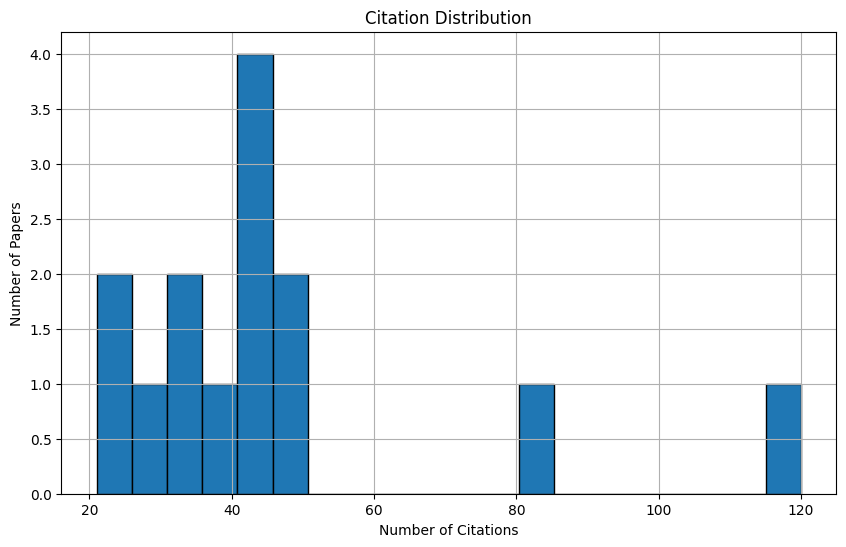

In [12]:
import csv
import matplotlib.pyplot as plt

def filter_and_sort_papers(input_filename, output_filename):
    filtered_papers = []

    # Read the papers from the CSV file
    with open(input_filename, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            citation_count = row['CitationCount']
            if citation_count and citation_count.isdigit() and int(citation_count) > 20:
                filtered_papers.append(row)

    # Sort papers by citation count in descending order
    filtered_papers.sort(key=lambda x: int(x['CitationCount']), reverse=True)

    # Write the filtered and sorted papers to a new CSV file
    with open(output_filename, 'w', newline='', encoding='utf-8') as file:
        fieldnames = ["Title", "Year", "DOI", "CitationCount"]
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for paper in filtered_papers:
            writer.writerow(paper)

    return filtered_papers

def plot_citation_distribution(papers):
    citation_counts = [int(paper['CitationCount']) for paper in papers]

    plt.figure(figsize=(10, 6))
    plt.hist(citation_counts, bins=20, edgecolor='black')
    plt.title('Citation Distribution')
    plt.xlabel('Number of Citations')
    plt.ylabel('Number of Papers')
    plt.grid(True)
    plt.show()

input_filename = 'mental_health_papers_with_citations.csv'
output_filename = 'filtered_sorted_mental_health_papers.csv'
filtered_papers = filter_and_sort_papers(input_filename, output_filename)

print(f"Filtered and sorted papers saved to '{output_filename}'")

plot_citation_distribution(filtered_papers)
